This is the code for the Example 12. in the main text.
The following image is the SCM that we implement.

- Unobserved nodes: $X_2$
- Cause node: $X_4$
- Outcome node: $X_6$
- Node that satisfies the backdoor criterion for a pair $(X_4, X_6)$: $X_3$

<div>
<img src="../SCM_fig/SCM2.png" width="600"/>
</div>

- the structural equation: $X_i = f(PA(X_i)) + U_i$
  - $X_1 = U_1$
  - $X_2 = X_1^2 + U_2$
  - $X_3 = X_2 + U_3$
  - $X_4 = X_3^2 + X_3 + U_4$
  - $X_5 = X_3^2 + 0.1 + U_5$
  - $X_6 = X_2 X_4 + X_2 X_5 + X_4 X_5 + U_6$

In [2]:
# Import libraries
import numpy as np

import torch
import torch.nn.functional
import torch.utils.data
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.ioff()  # 対話モードを無効にする

# Warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

from func import normalize
from SCM2 import SCM2

  0%|          | 0/5 [00:00<?, ?it/s]

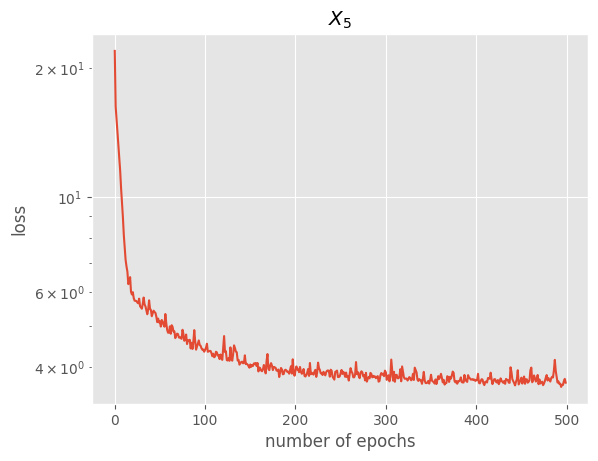

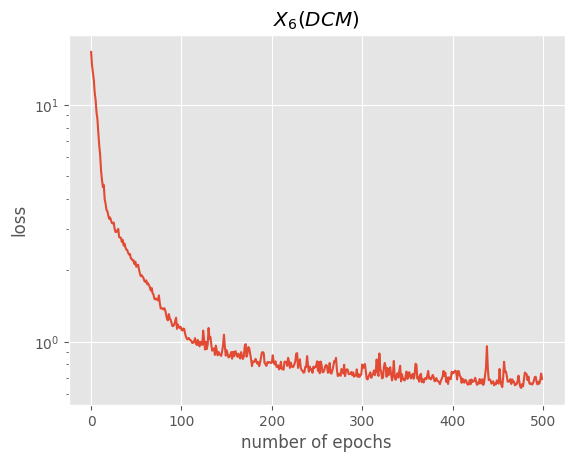

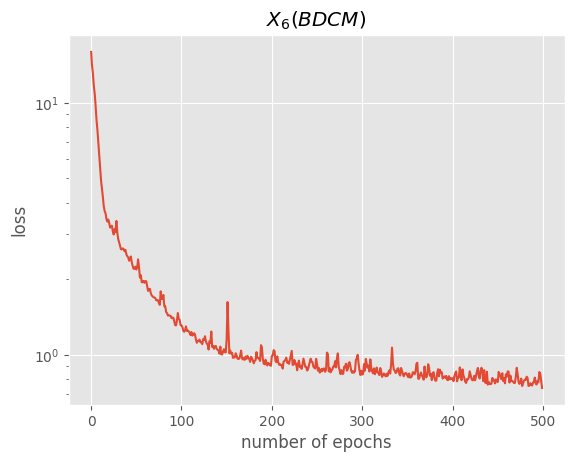

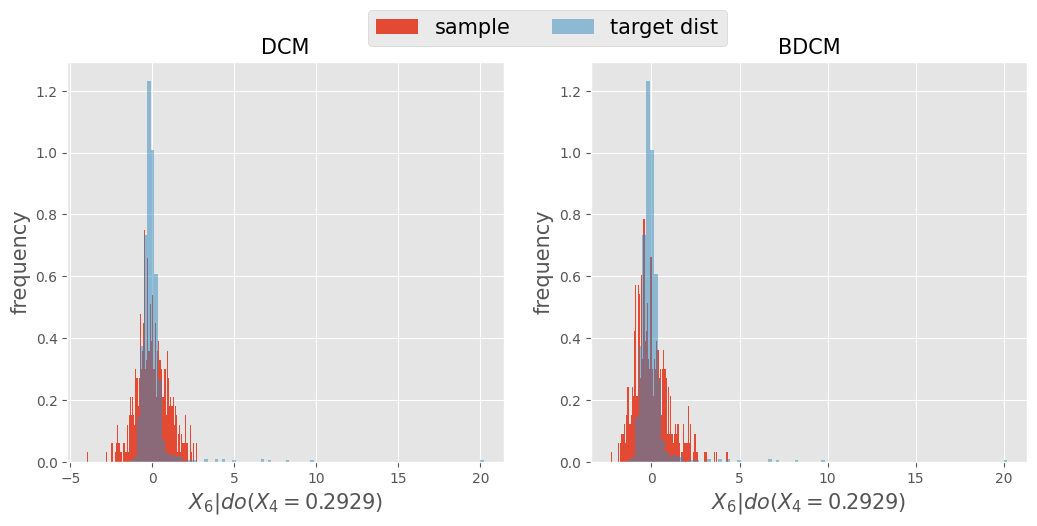

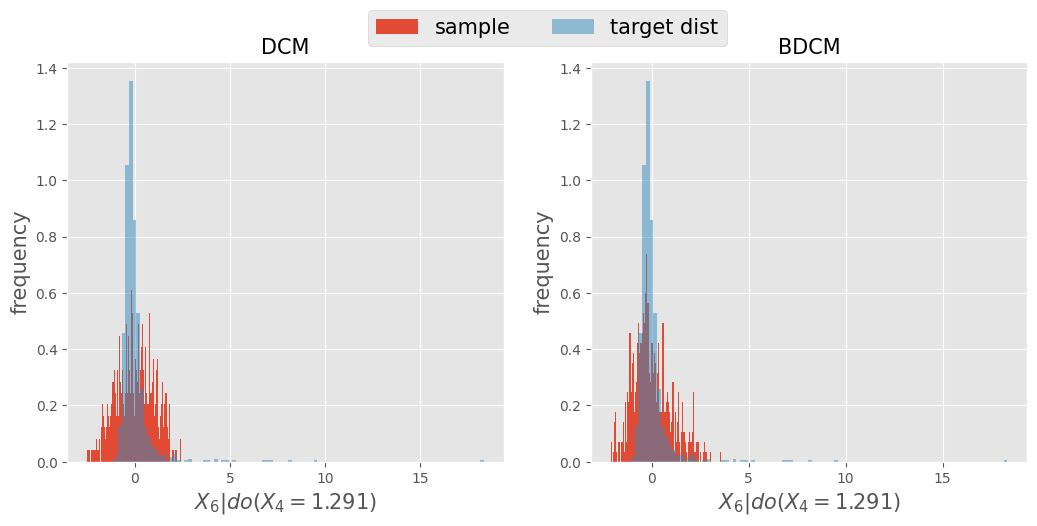

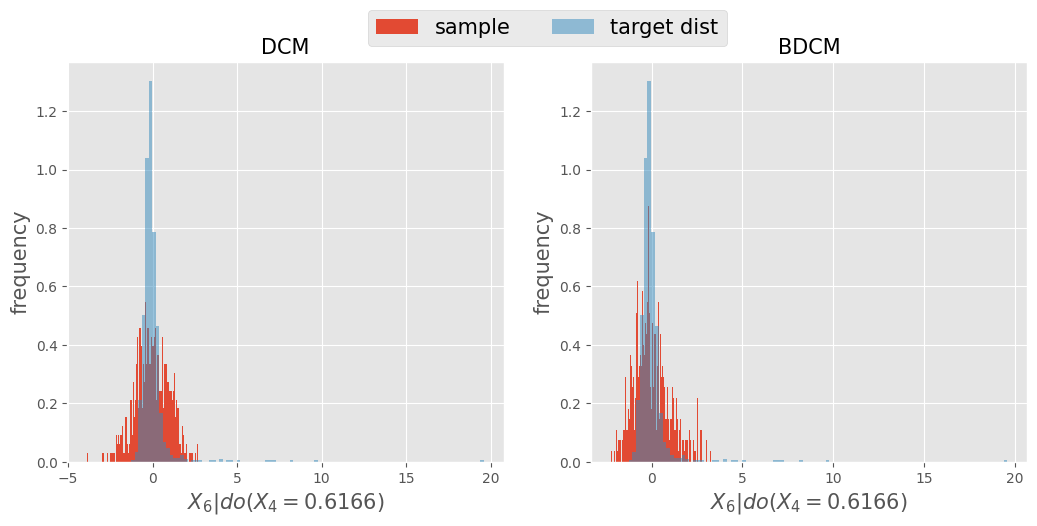

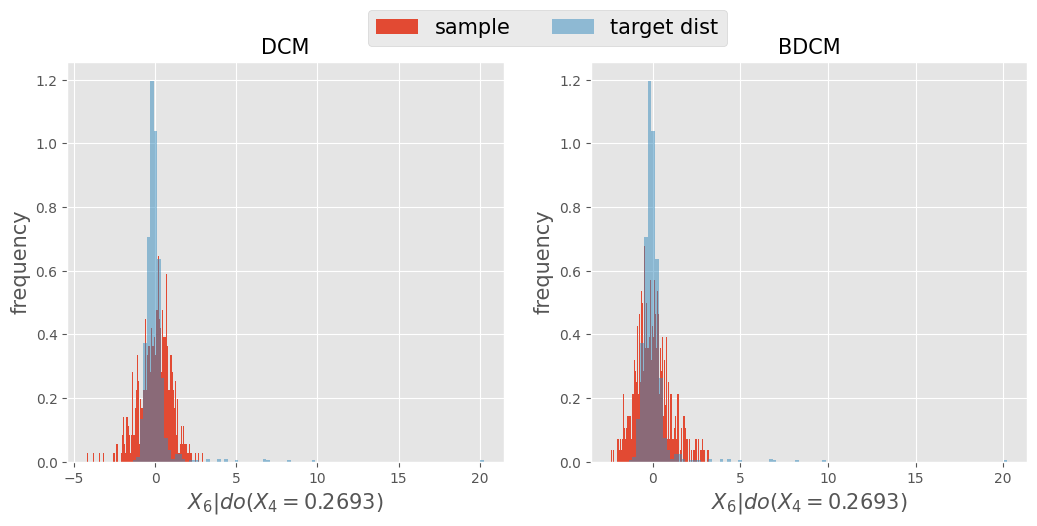

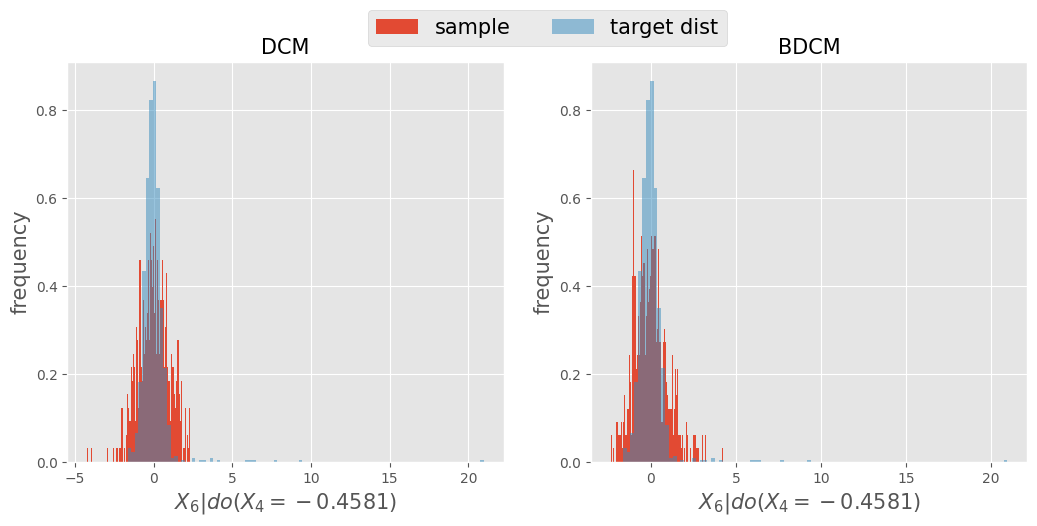

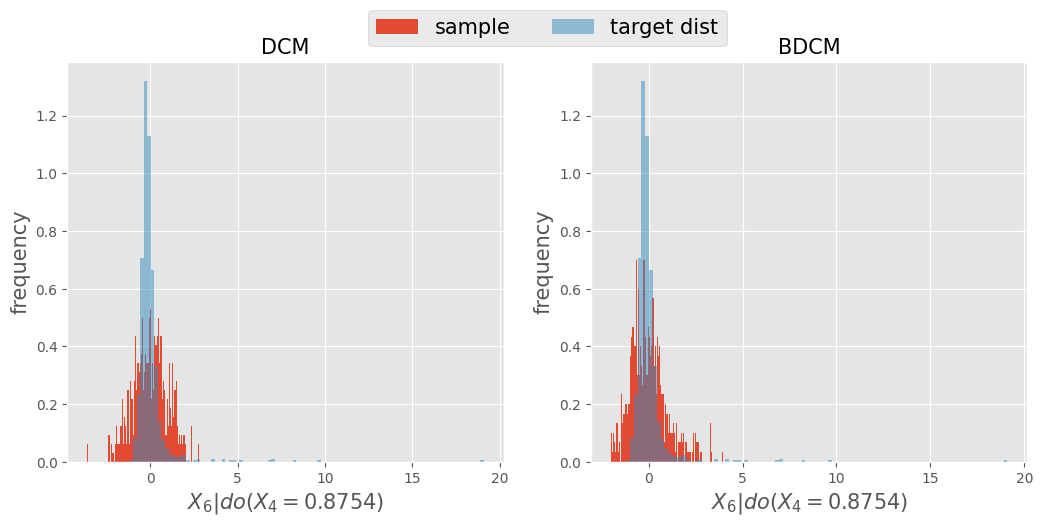

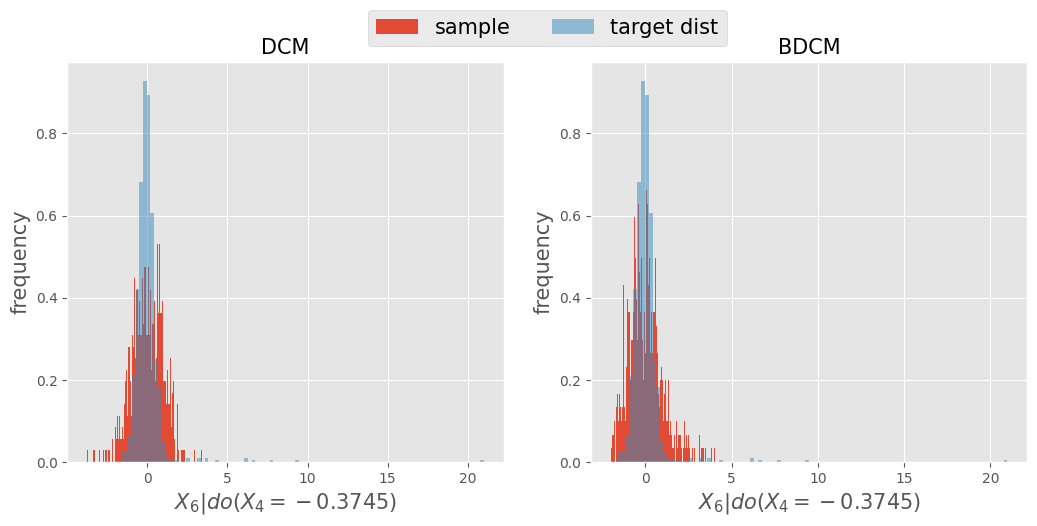

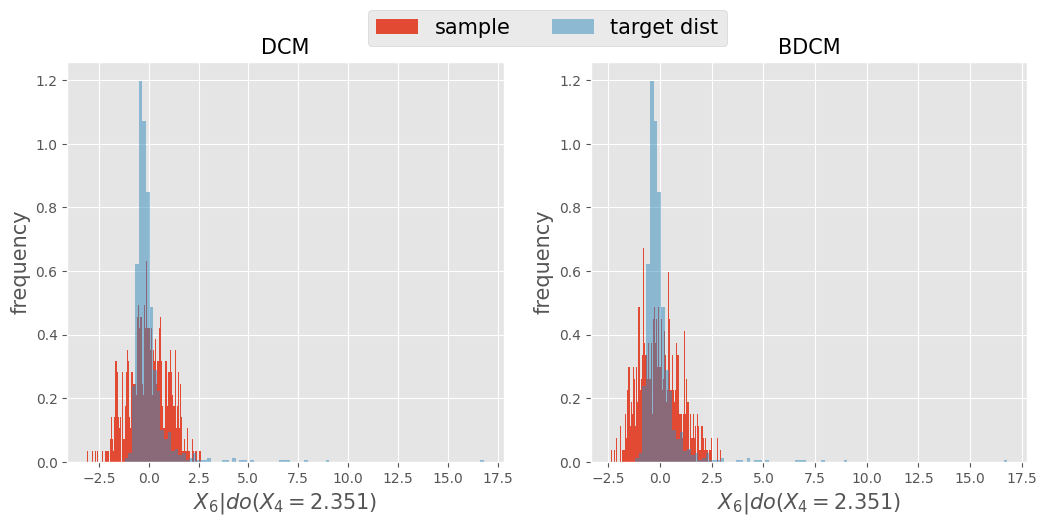

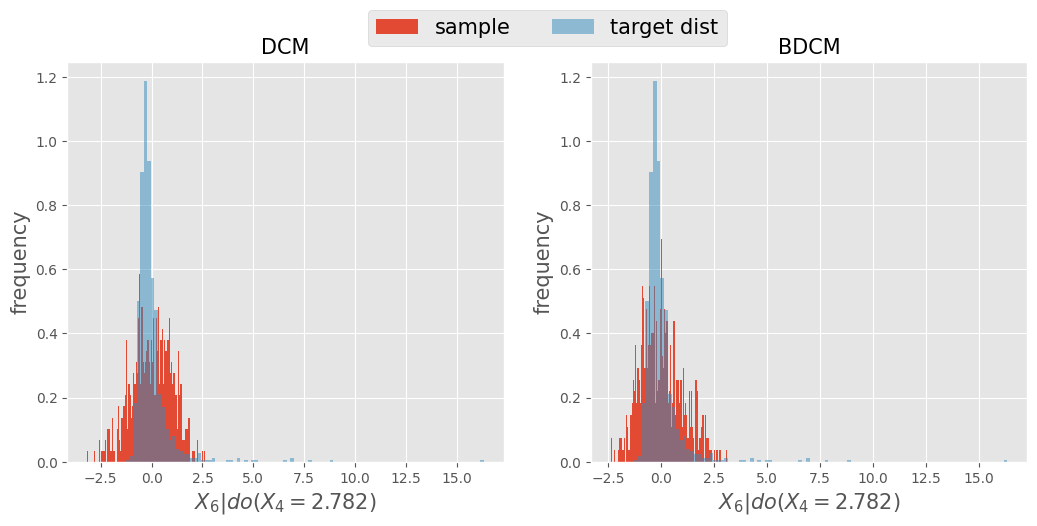

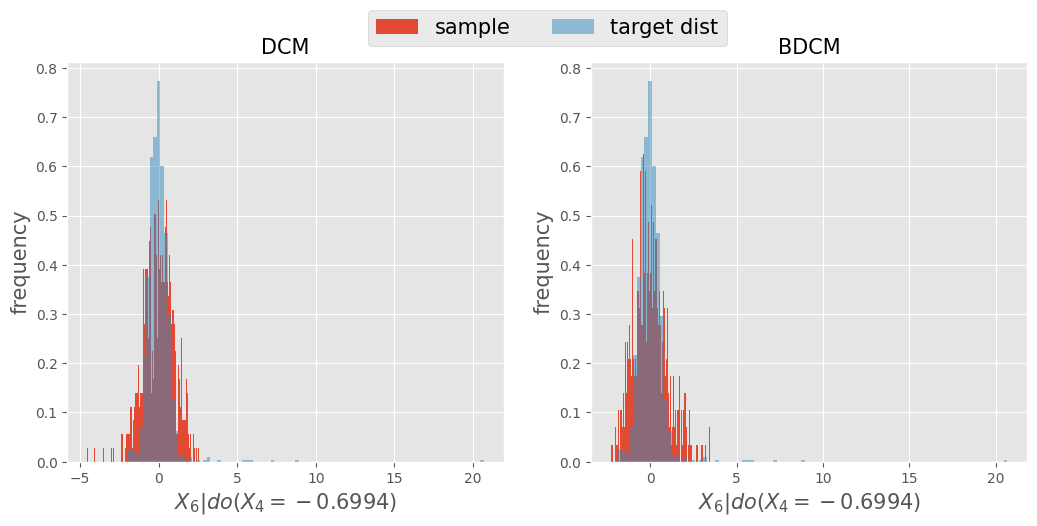

 20%|██        | 1/5 [09:03<36:12, 543.15s/it]

mean of MMD for DCM: 0.00668
standard deviation of MMD for DCM: 0.000751
mean of MMD for BDCM: 0.00562
standard deviation of MMD for BDCM: 0.00059


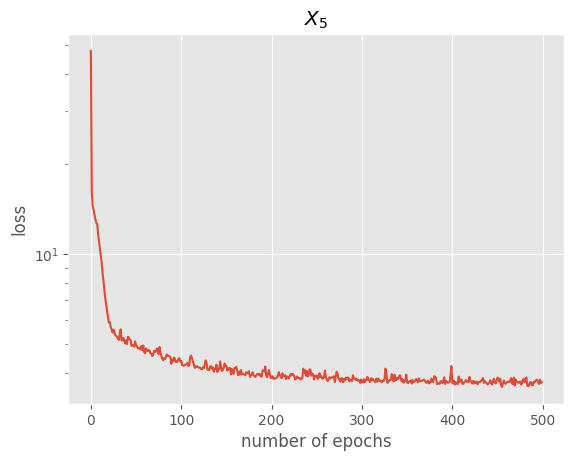

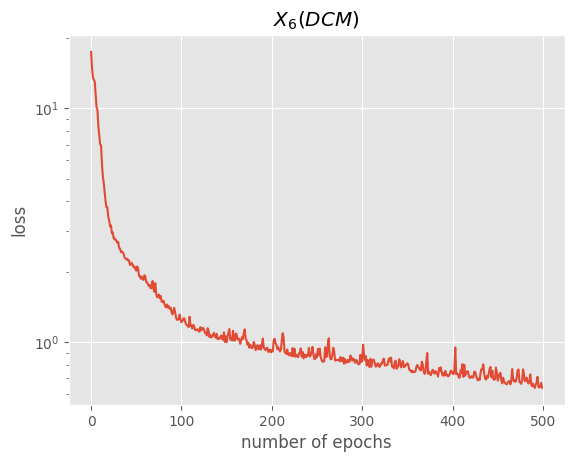

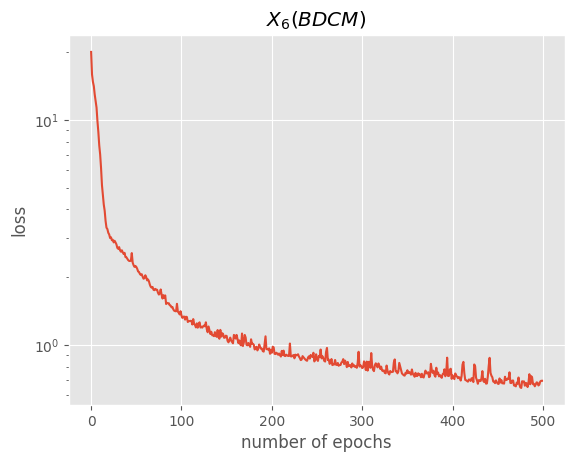

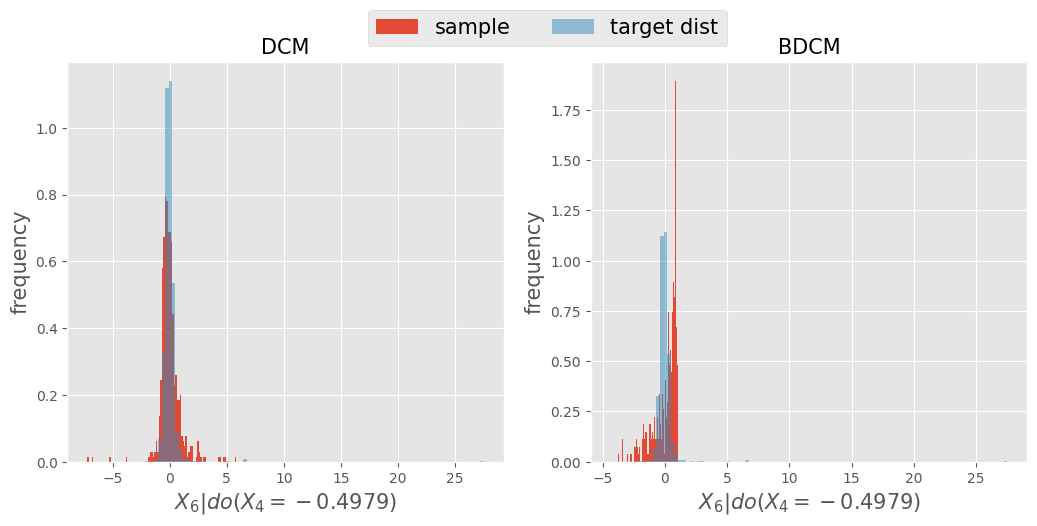

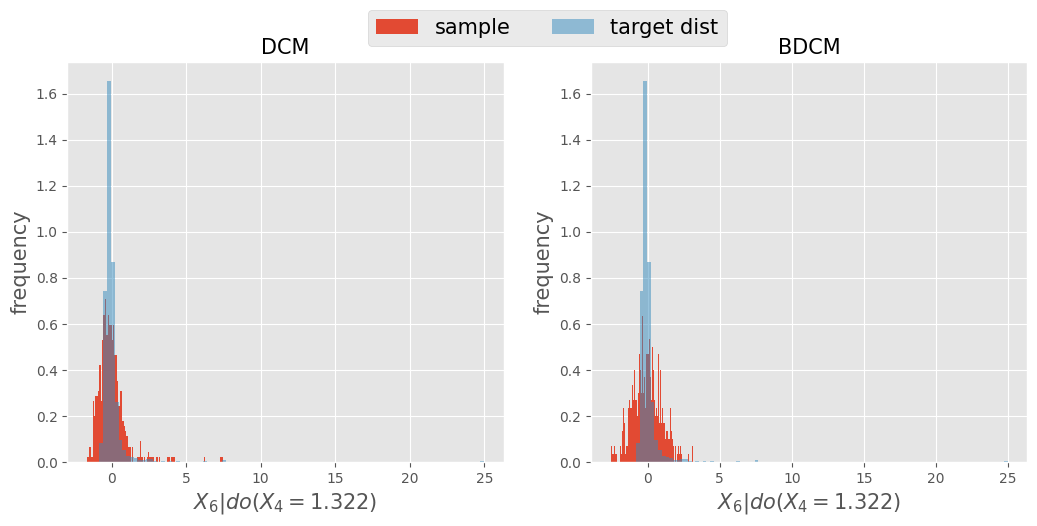

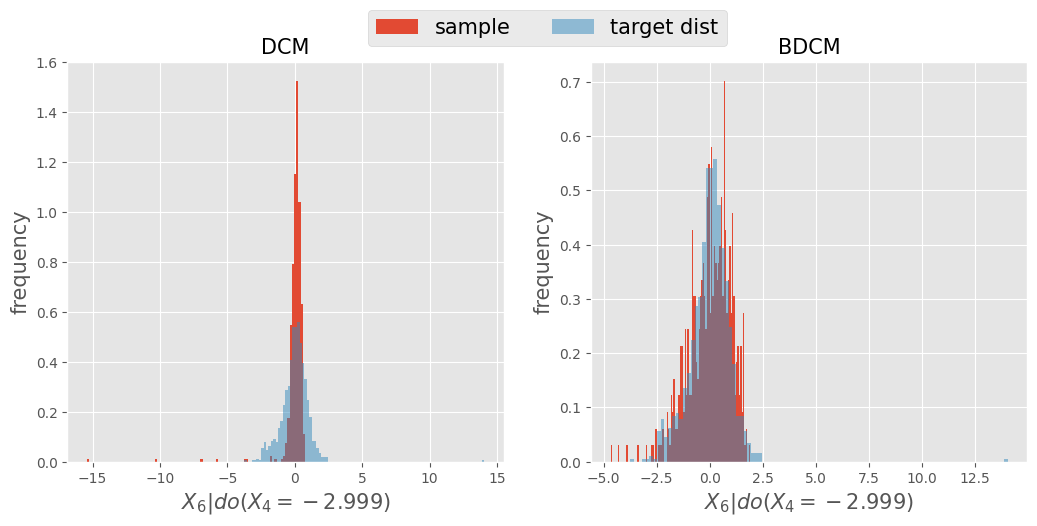

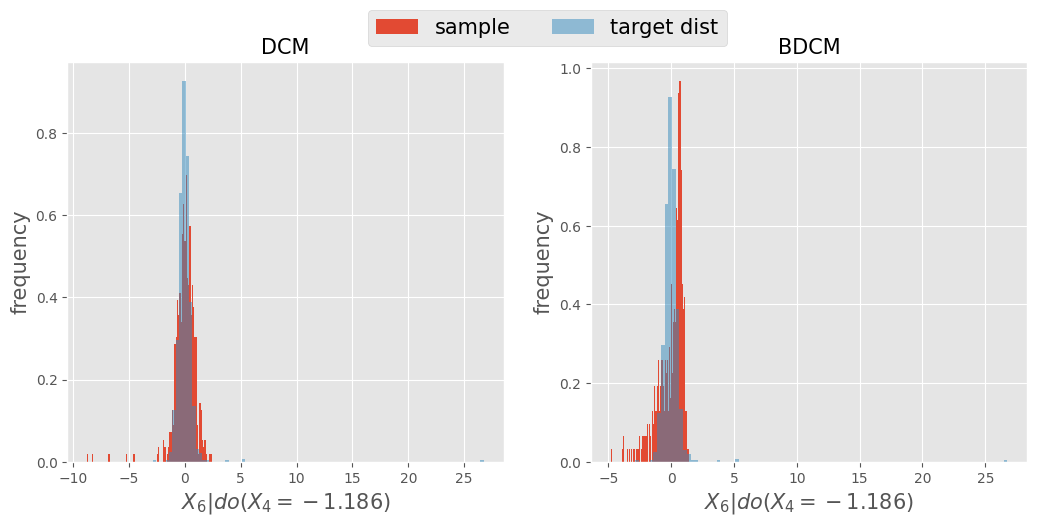

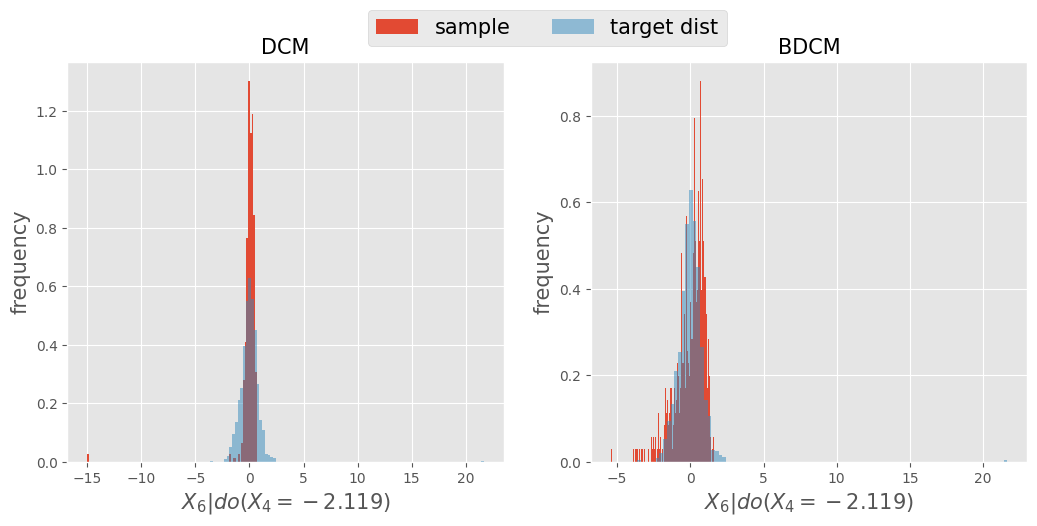

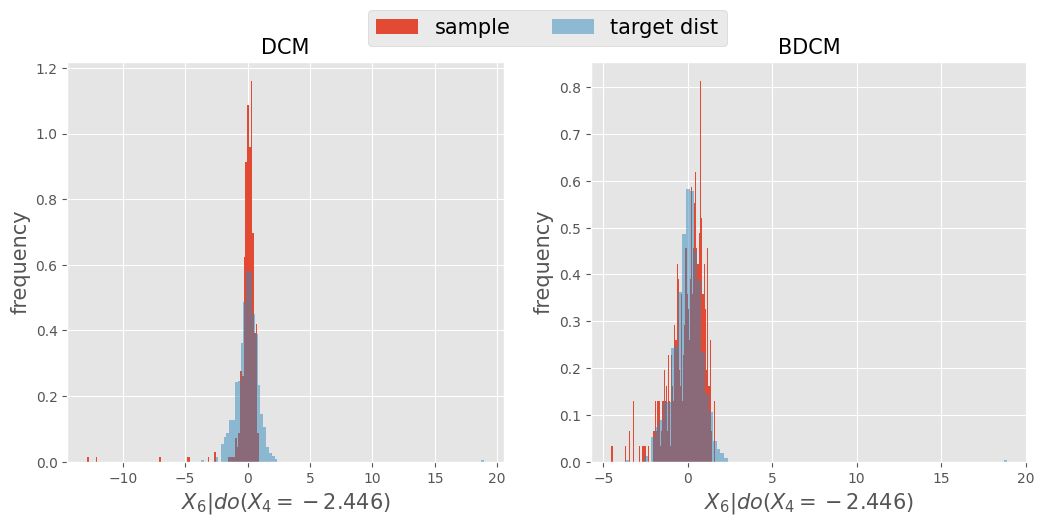

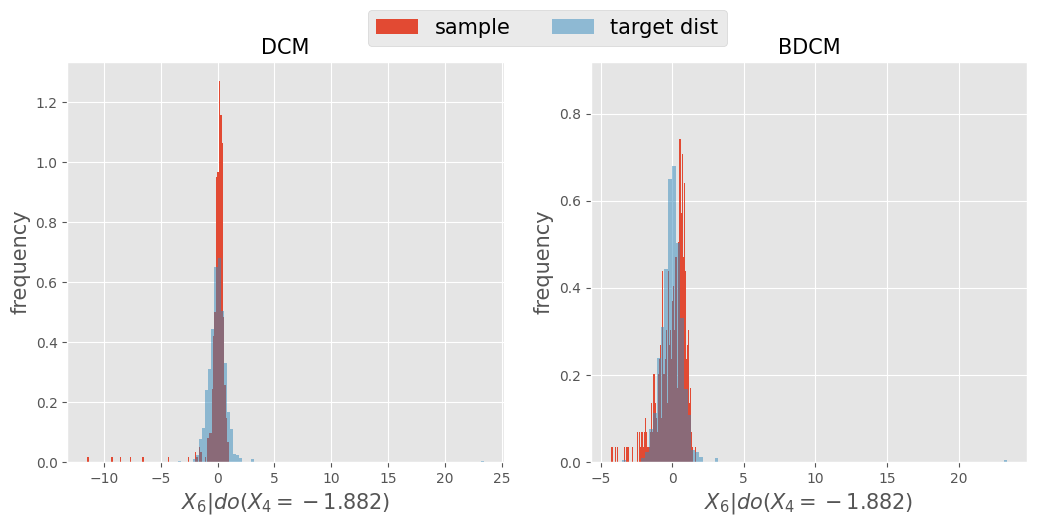

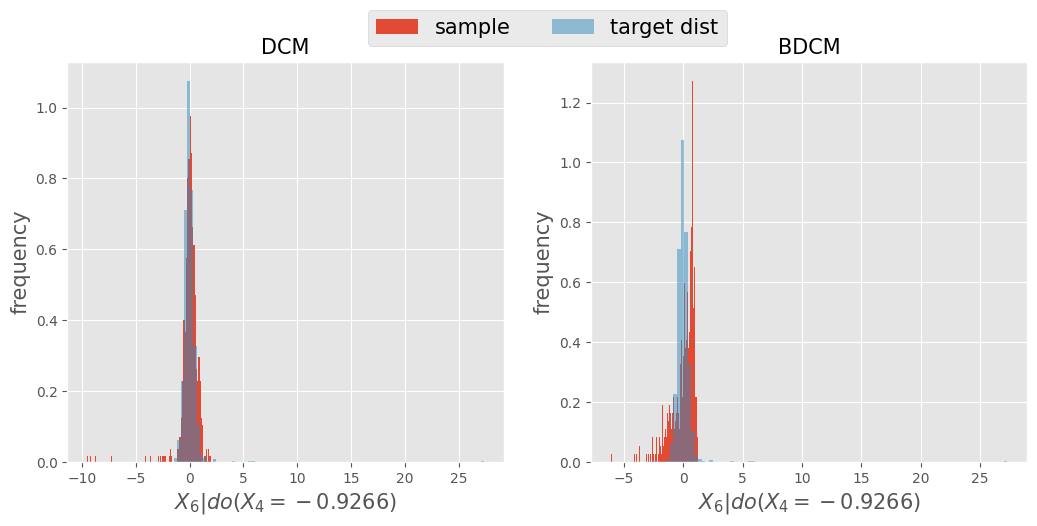

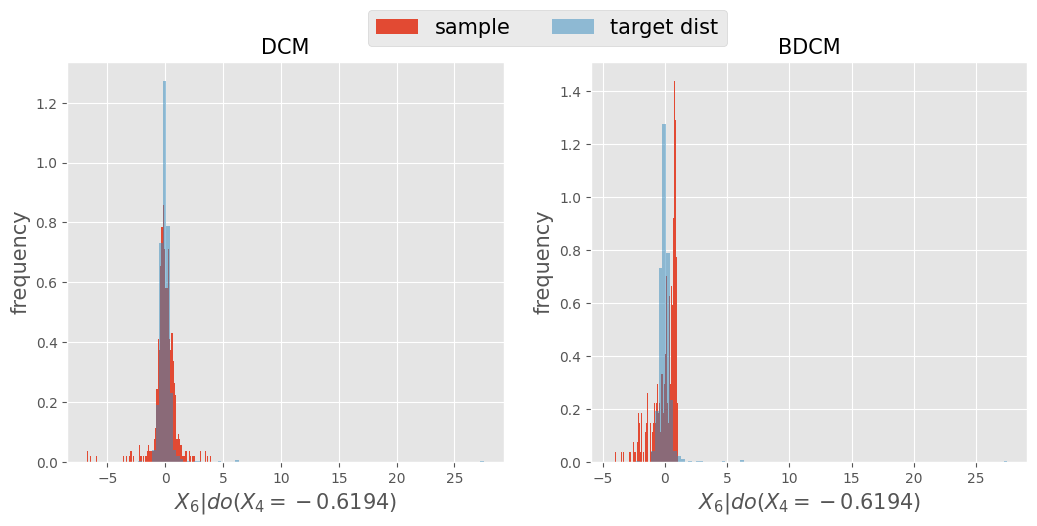

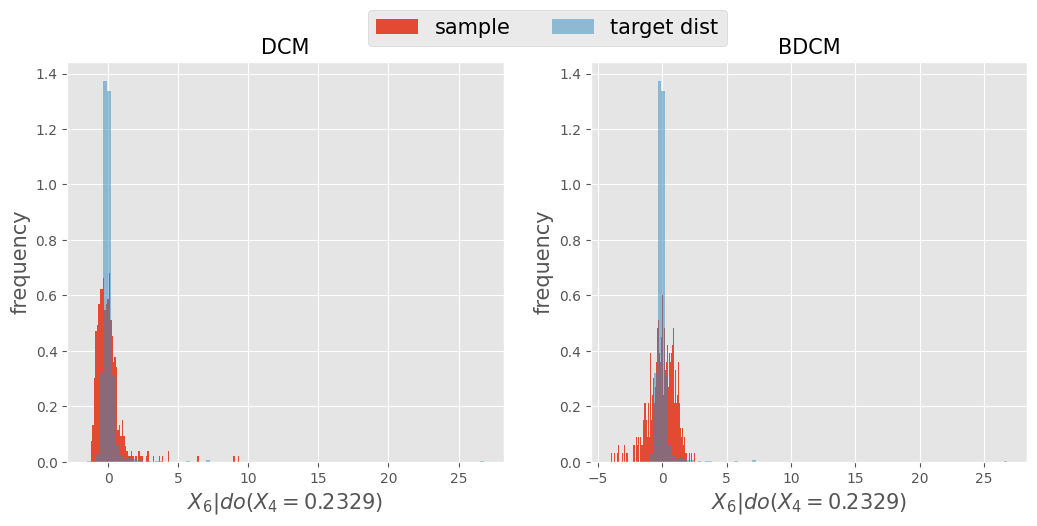

 40%|████      | 2/5 [18:03<27:03, 541.23s/it]

mean of MMD for DCM: 0.0046
standard deviation of MMD for DCM: 0.000978
mean of MMD for BDCM: 0.00633
standard deviation of MMD for BDCM: 0.00284


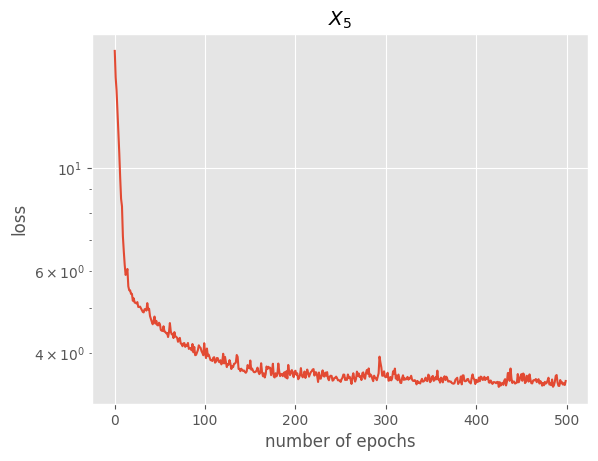

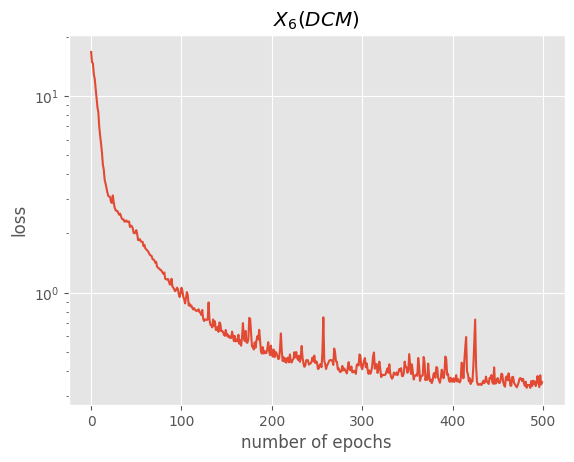

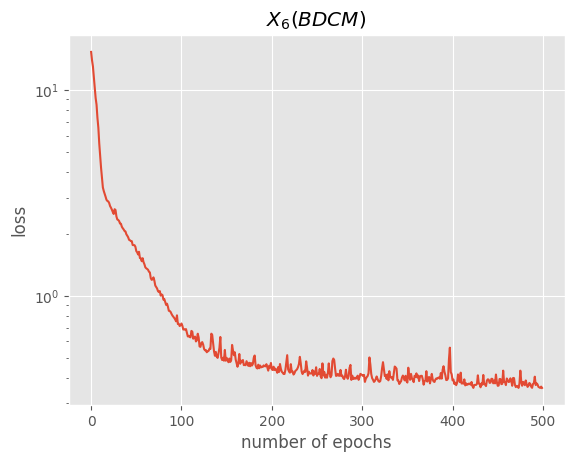

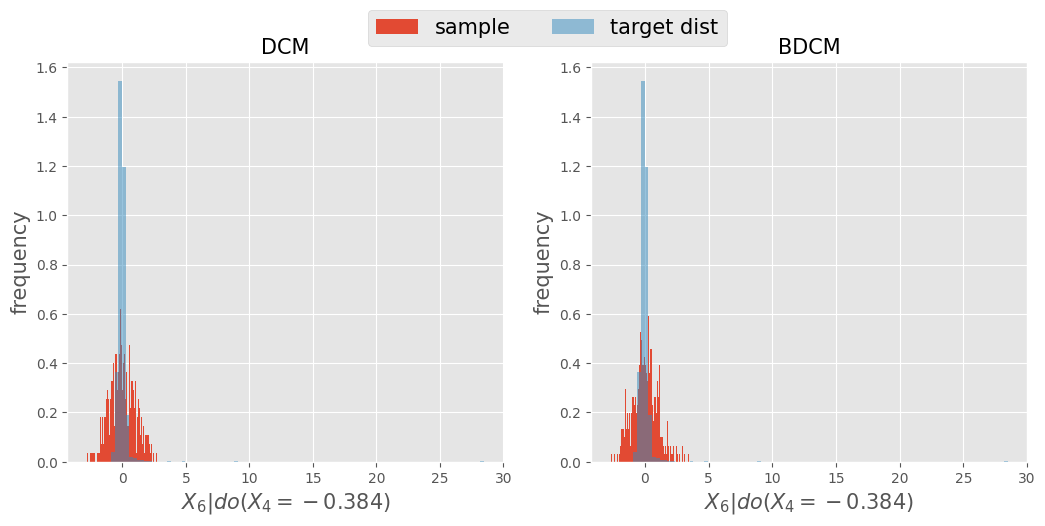

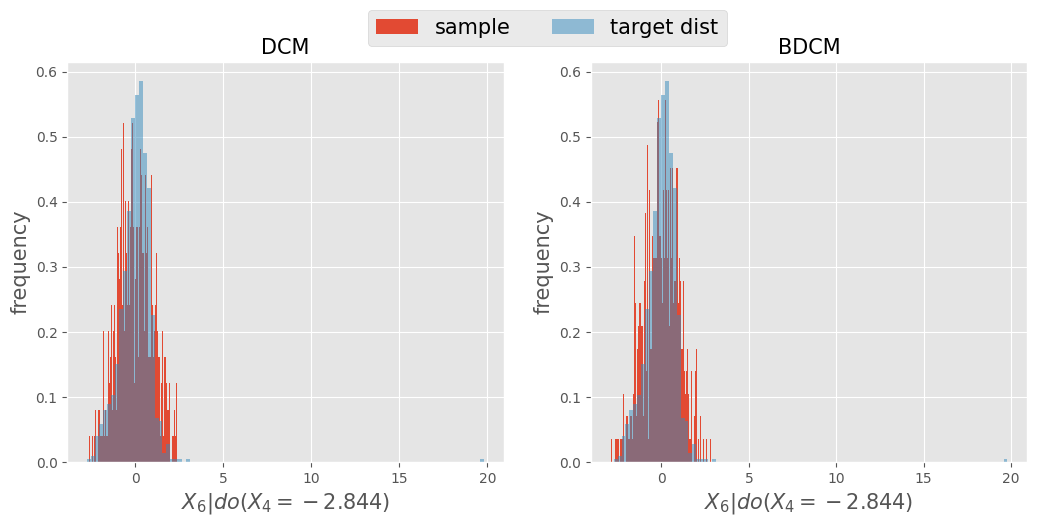

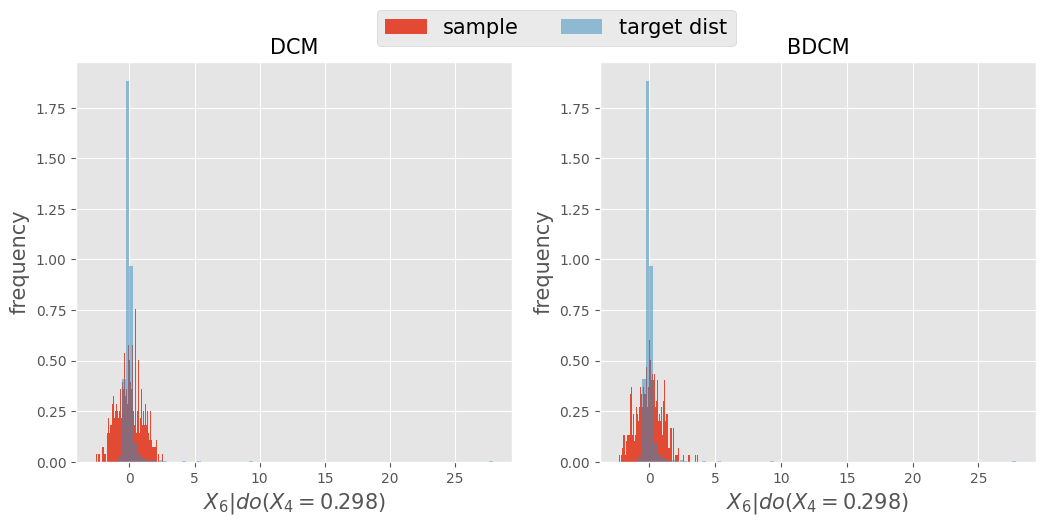

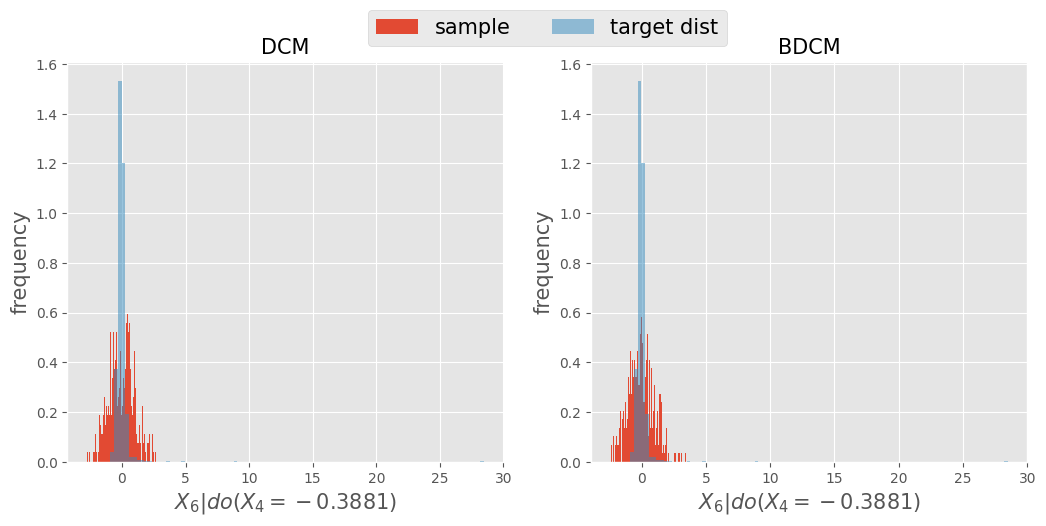

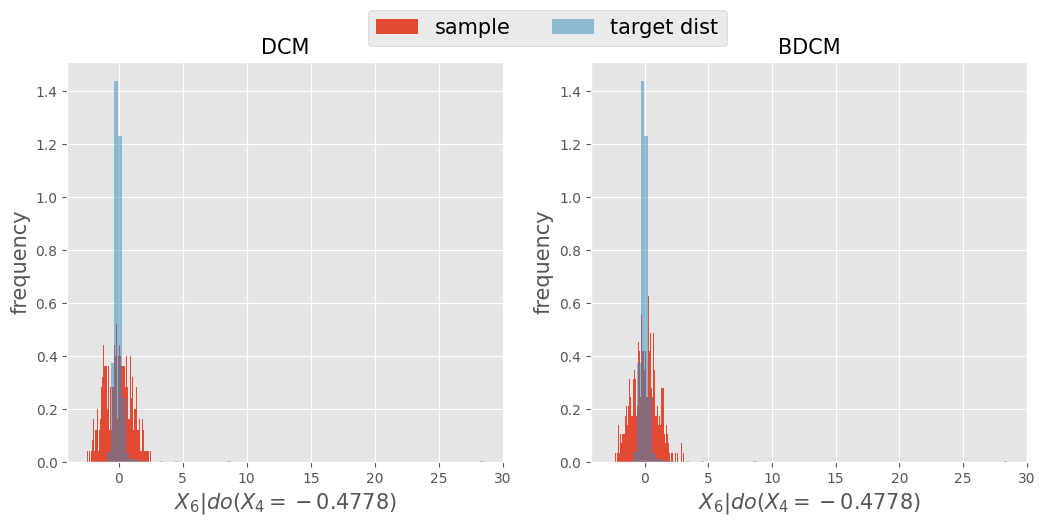

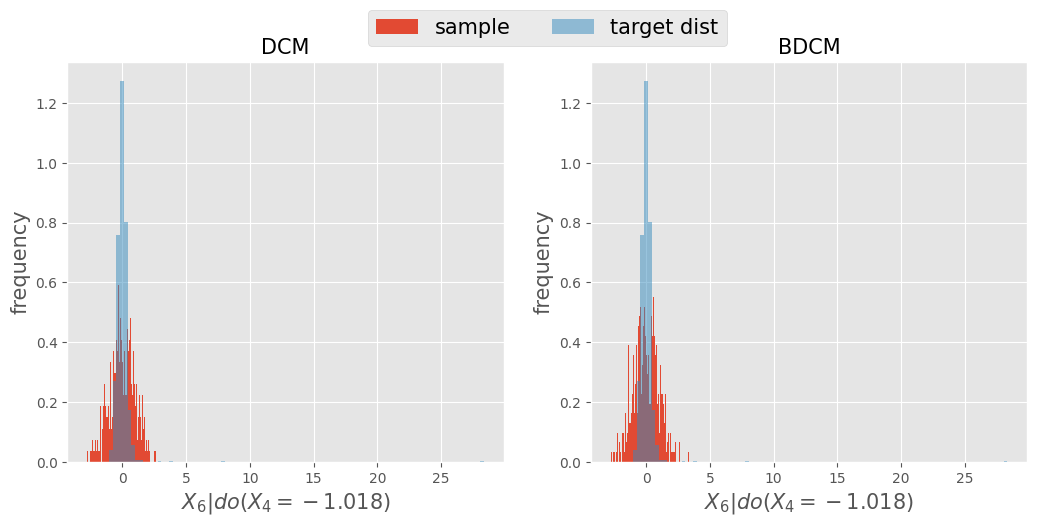

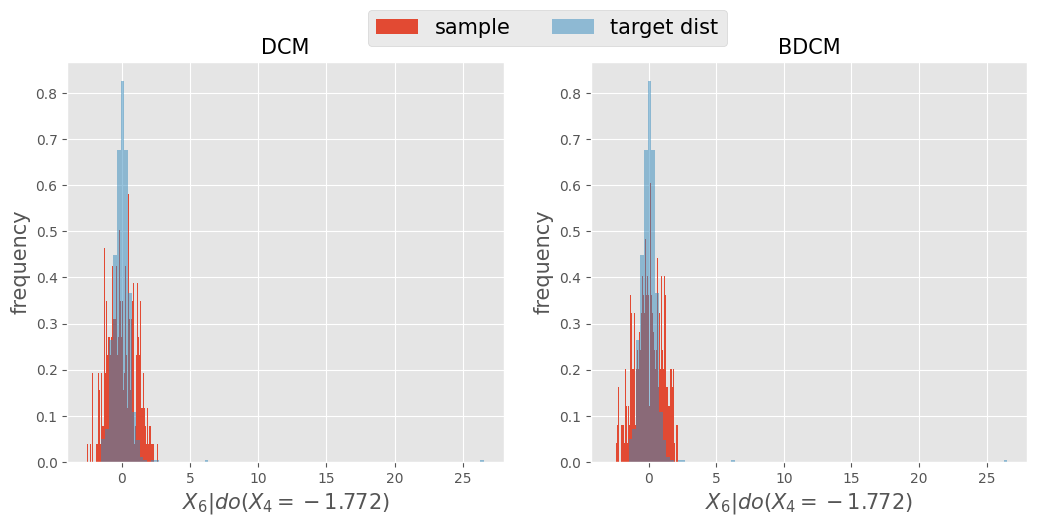

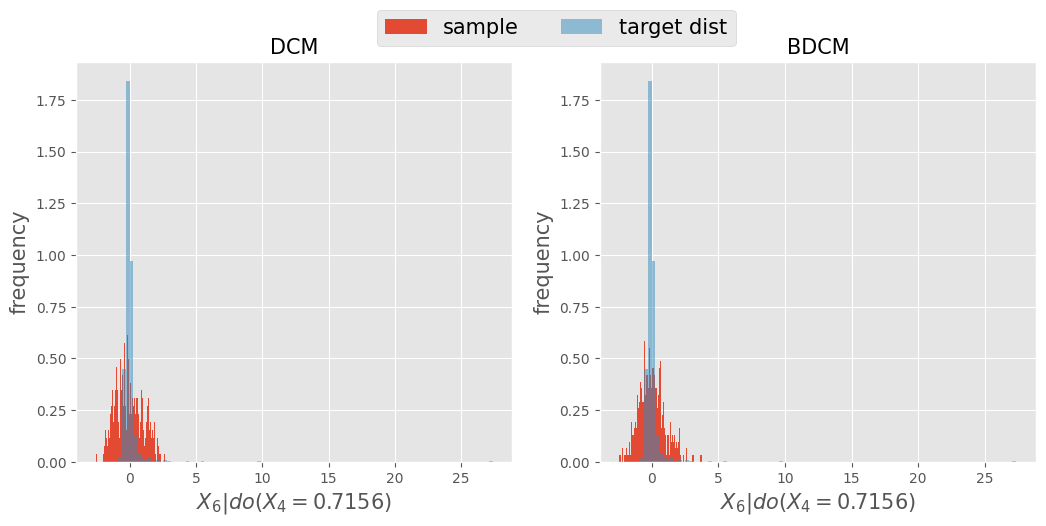

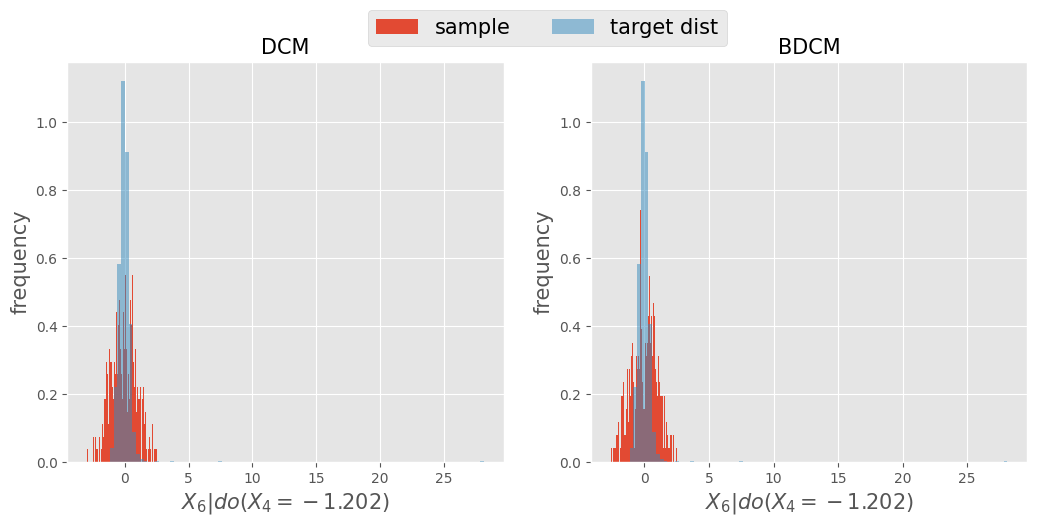

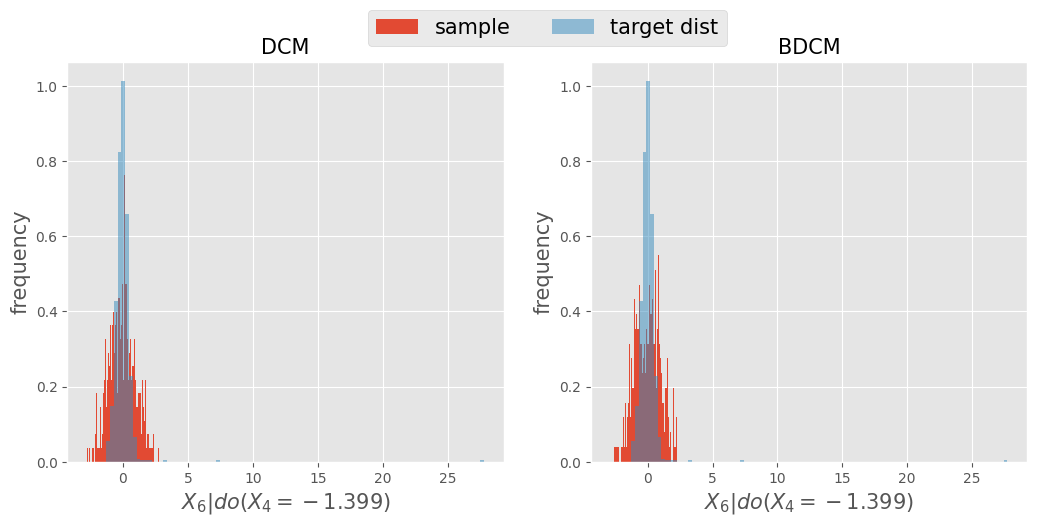

 60%|██████    | 3/5 [26:57<17:56, 538.18s/it]

mean of MMD for DCM: 0.0068
standard deviation of MMD for DCM: 0.00197
mean of MMD for BDCM: 0.0066
standard deviation of MMD for BDCM: 0.00187


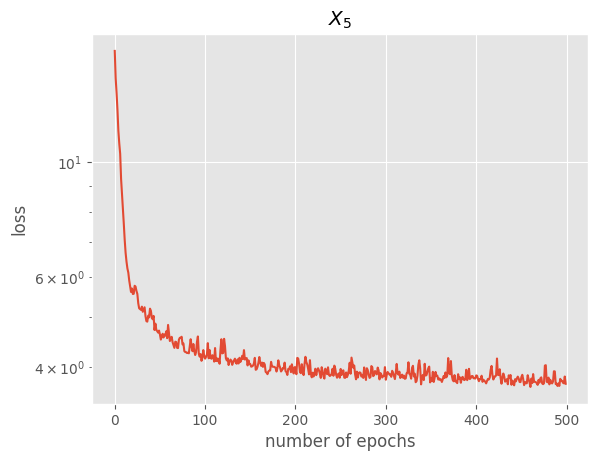

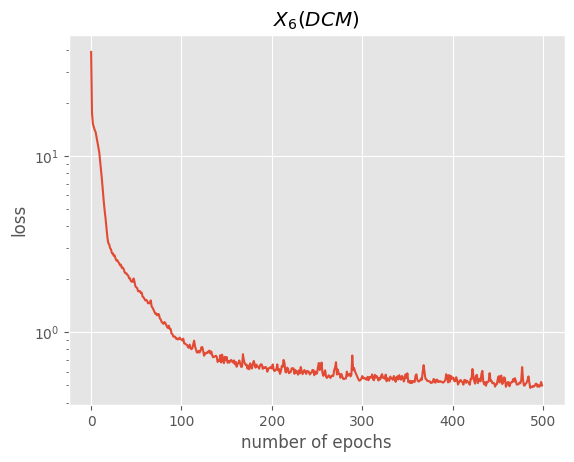

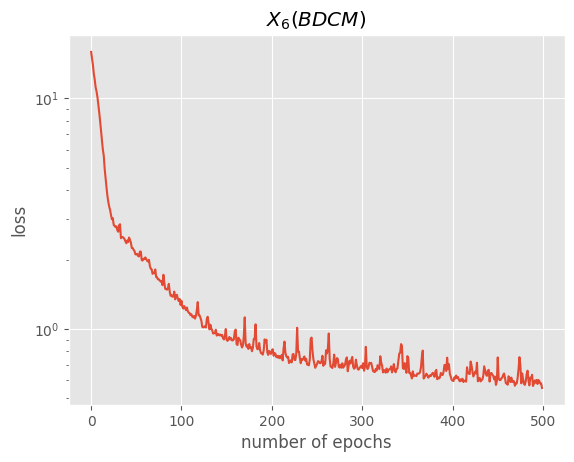

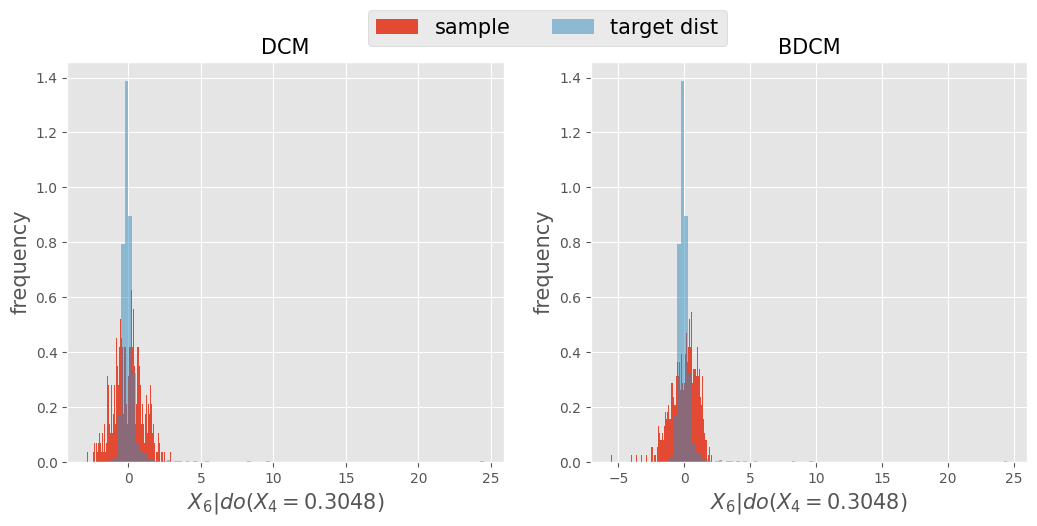

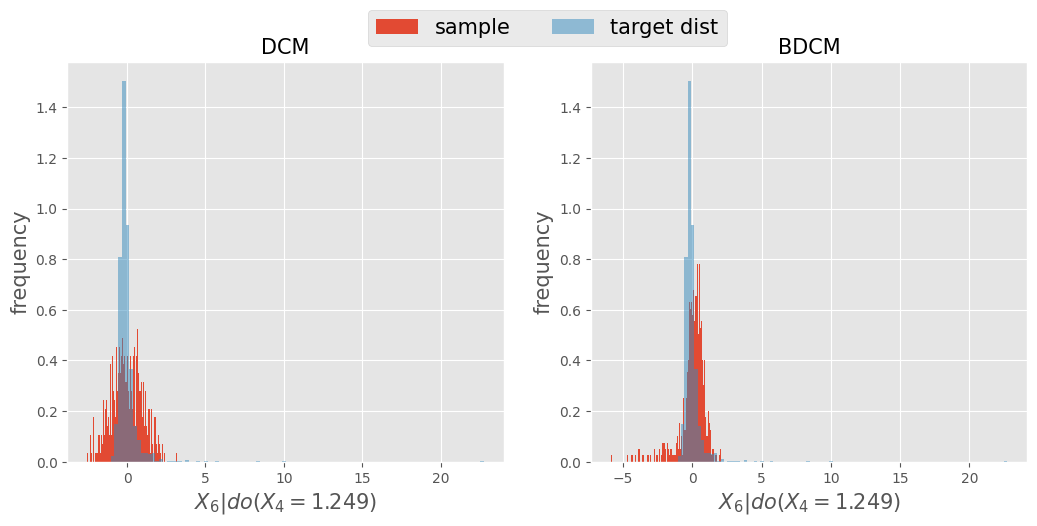

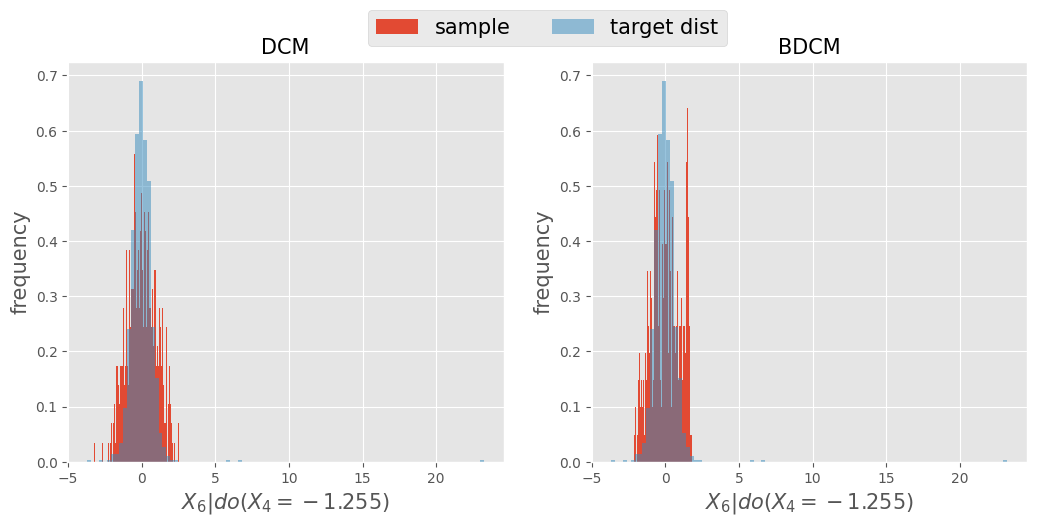

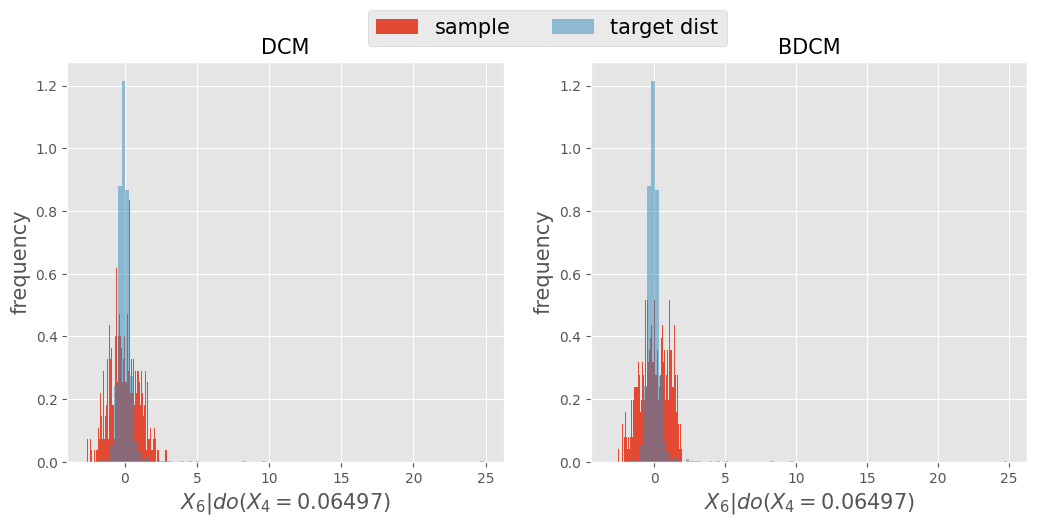

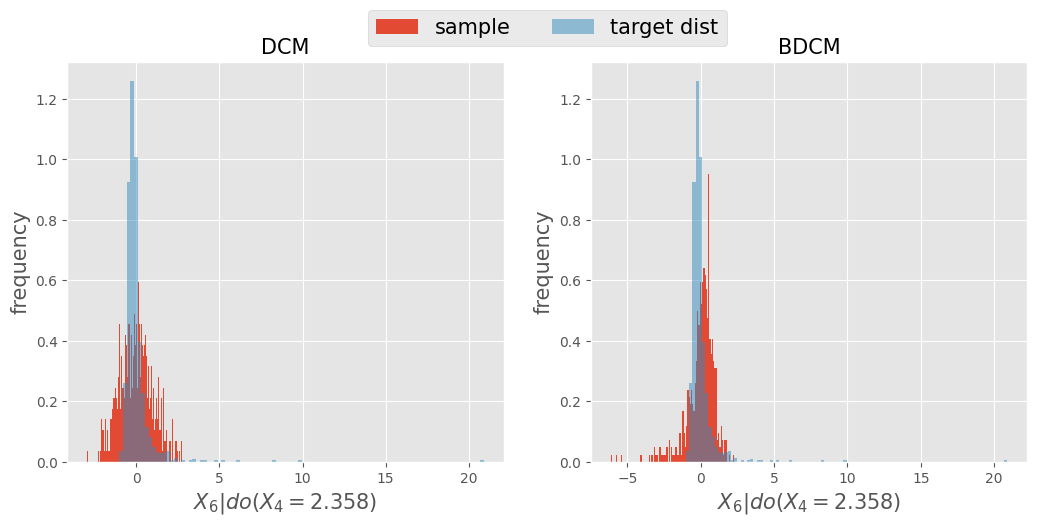

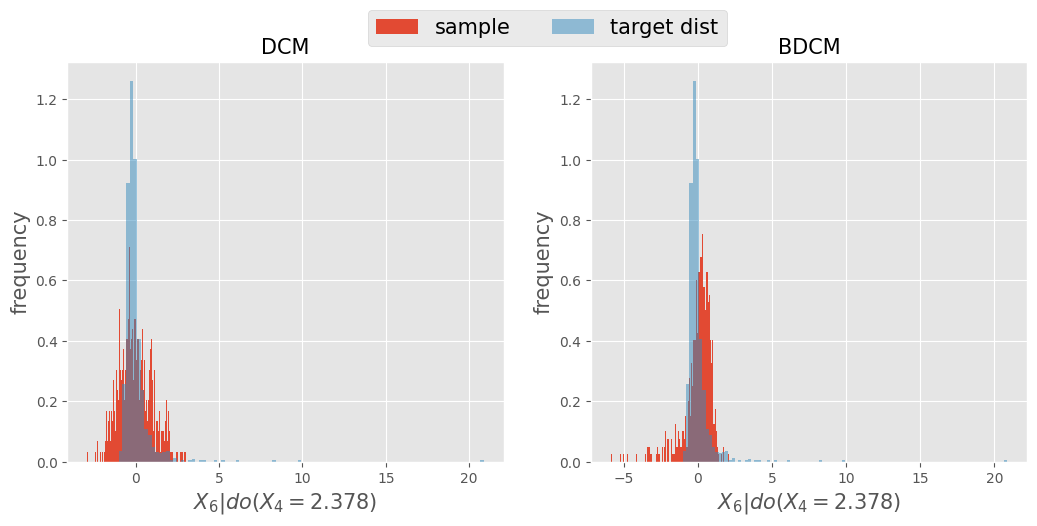

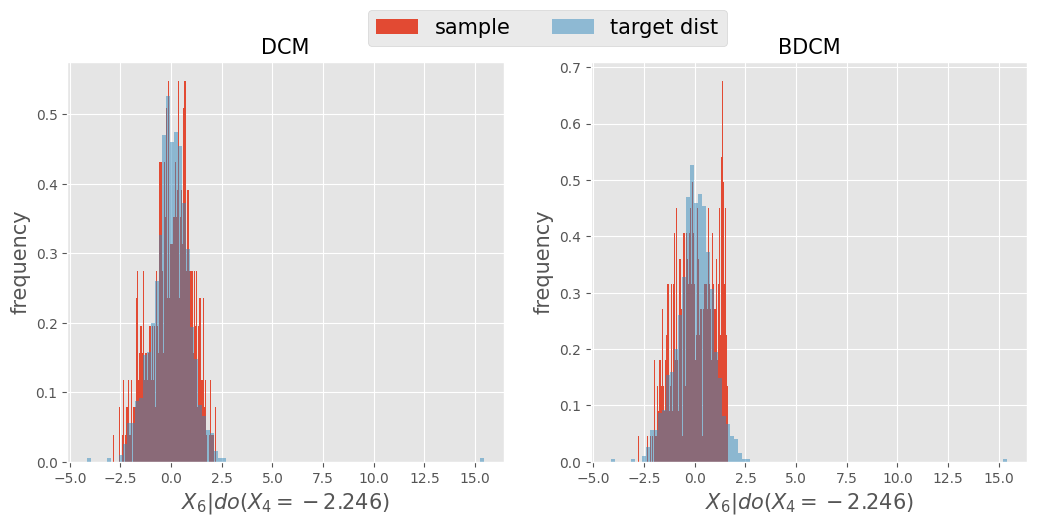

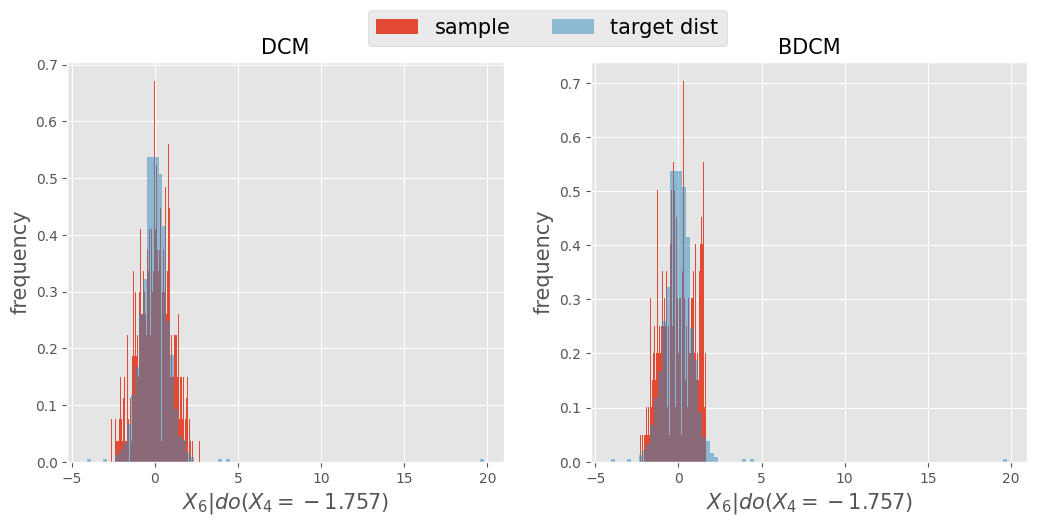

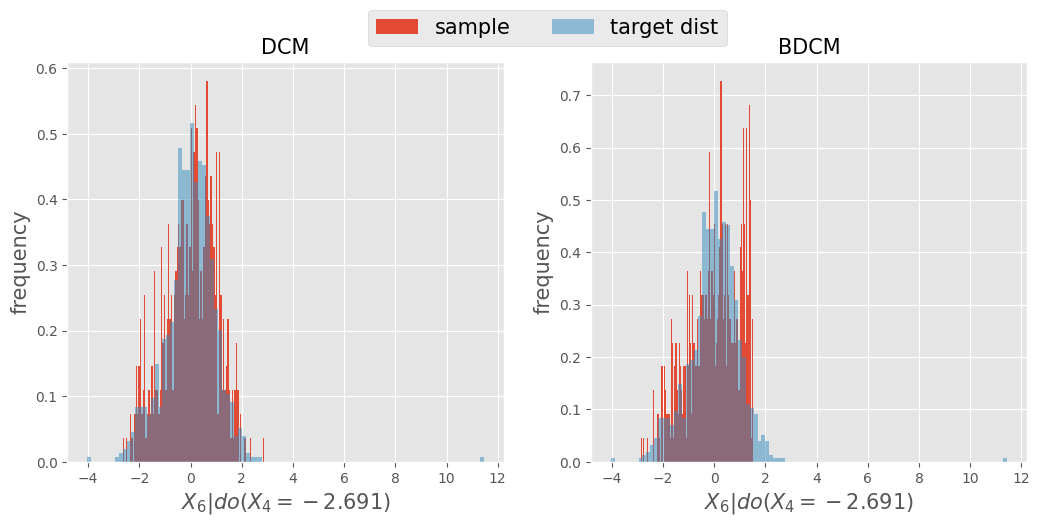

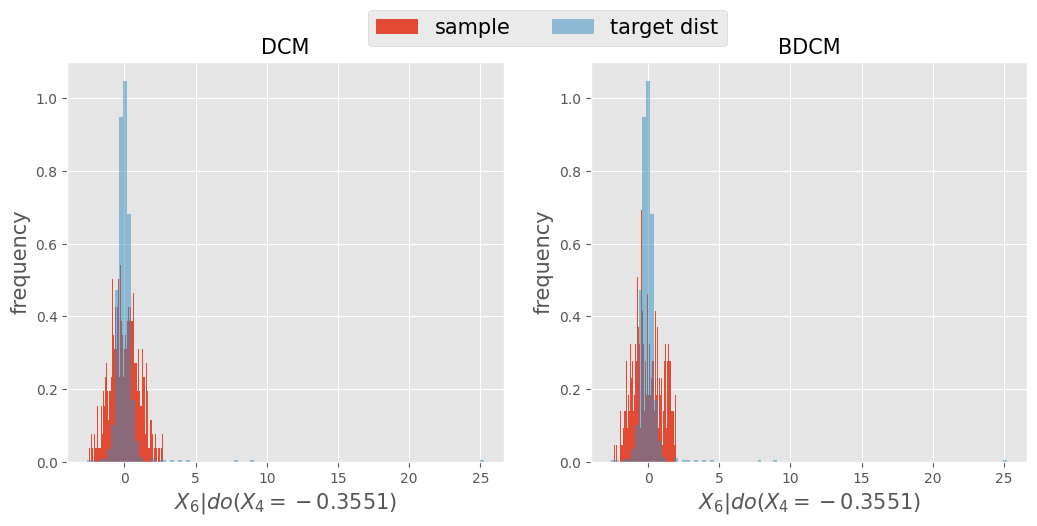

 80%|████████  | 4/5 [35:56<08:58, 538.64s/it]

mean of MMD for DCM: 0.0042
standard deviation of MMD for DCM: 0.0022
mean of MMD for BDCM: 0.00451
standard deviation of MMD for BDCM: 0.00229


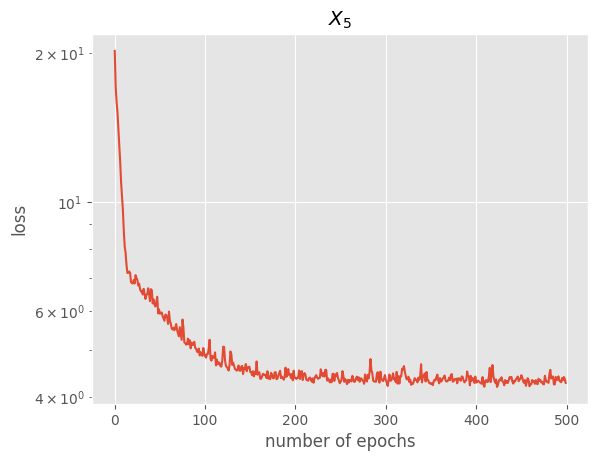

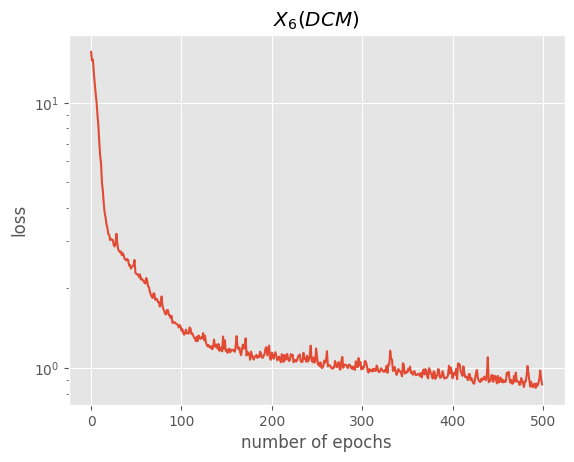

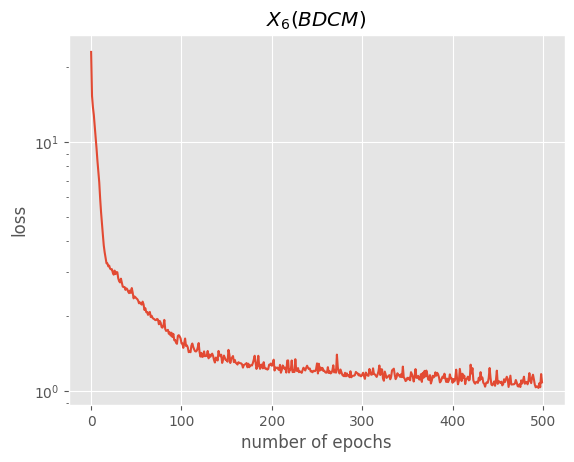

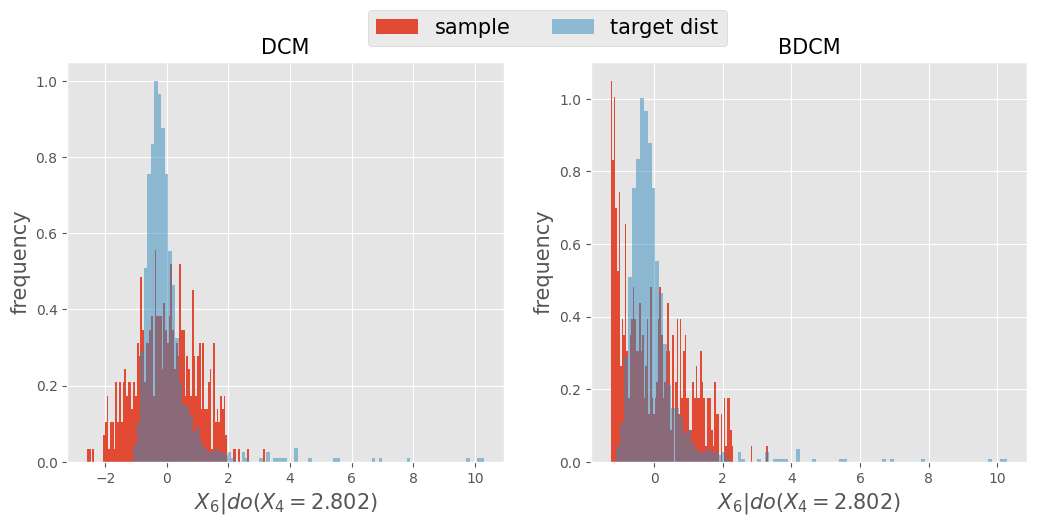

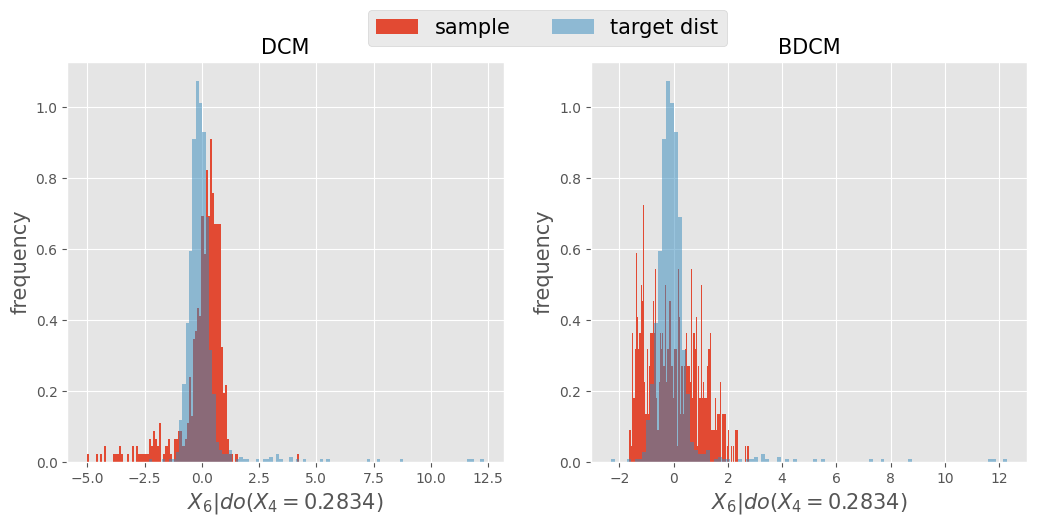

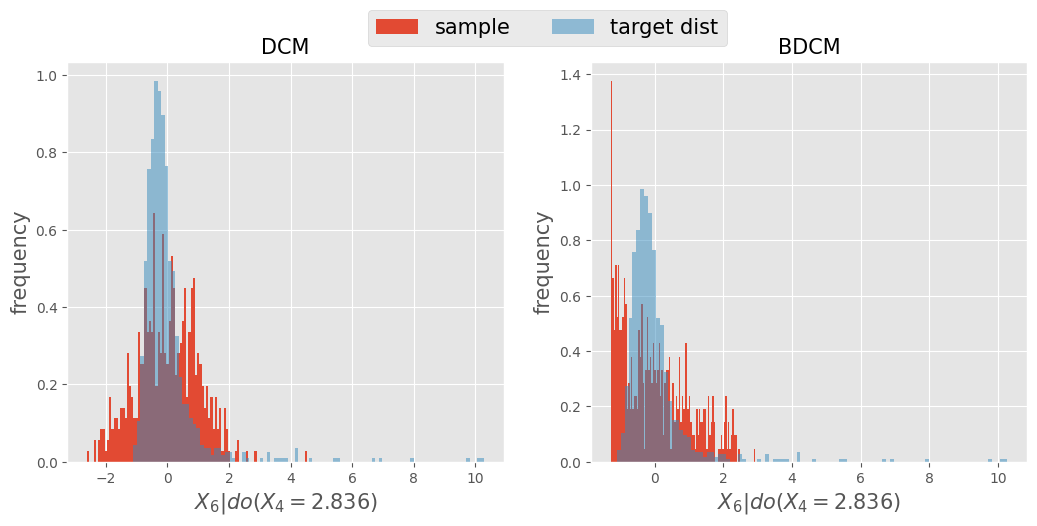

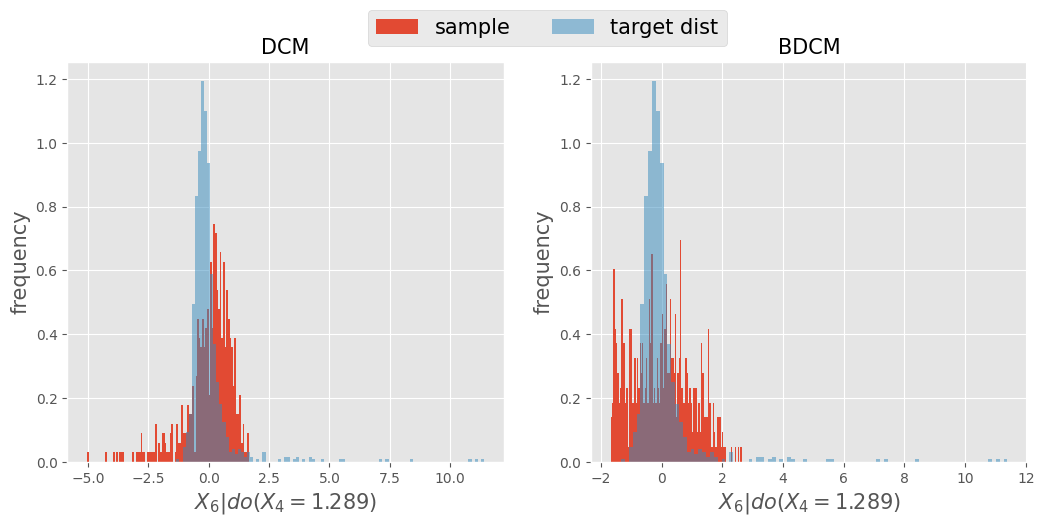

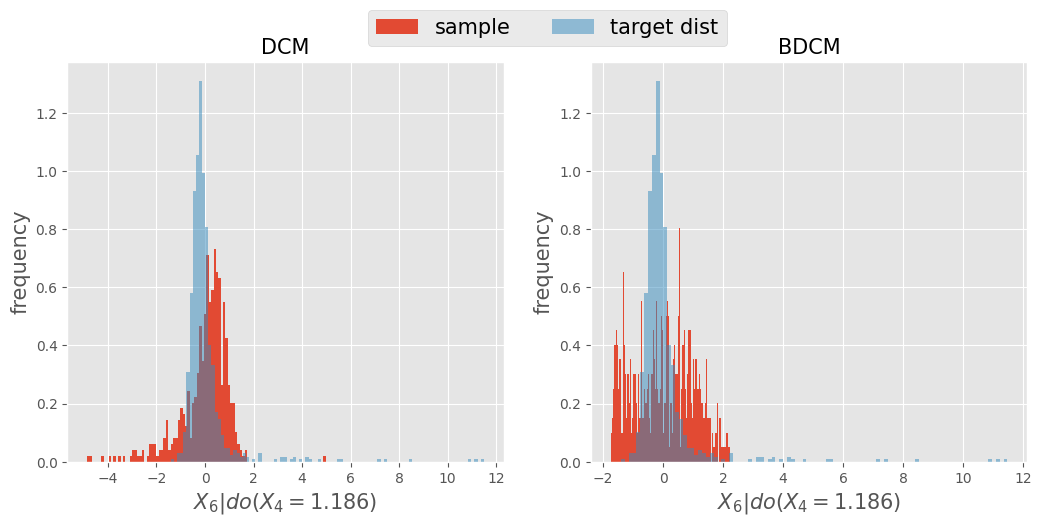

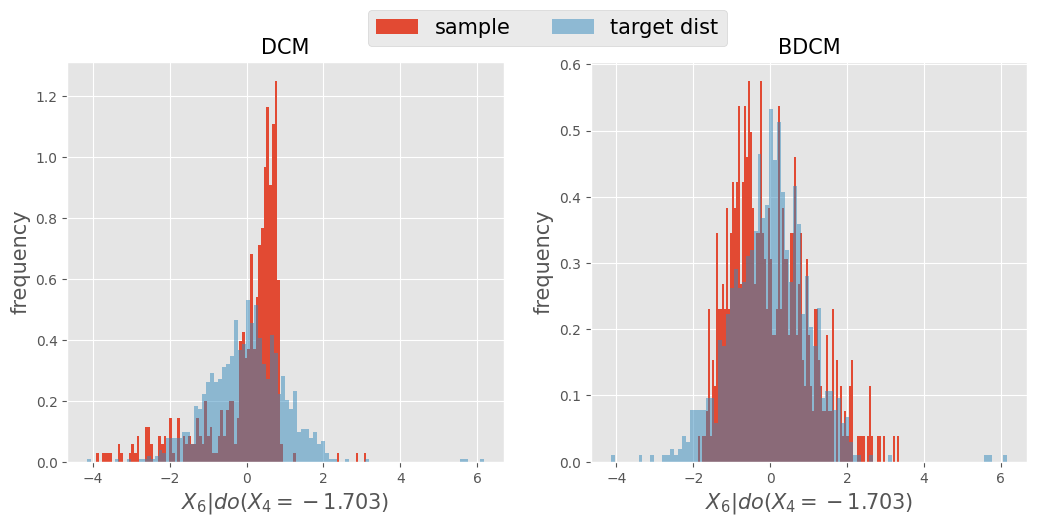

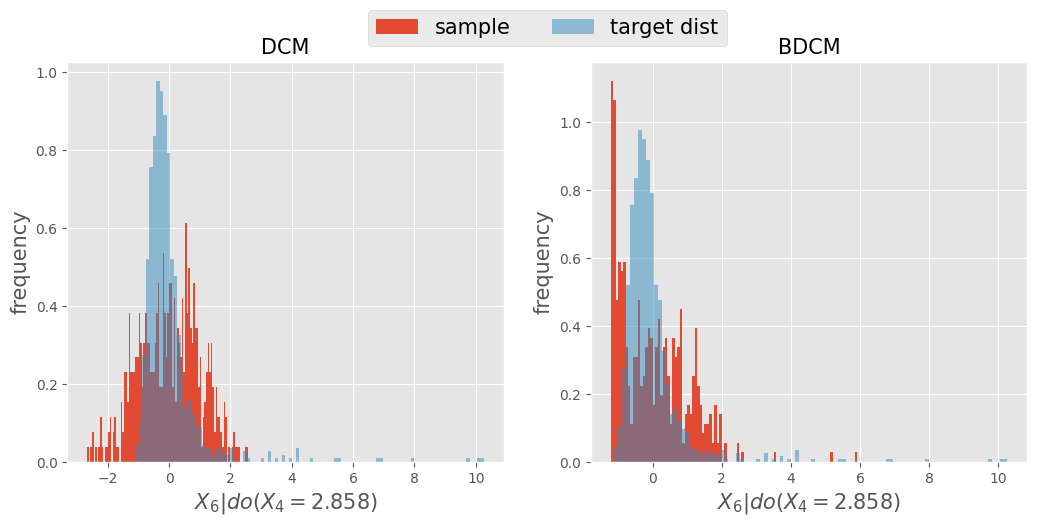

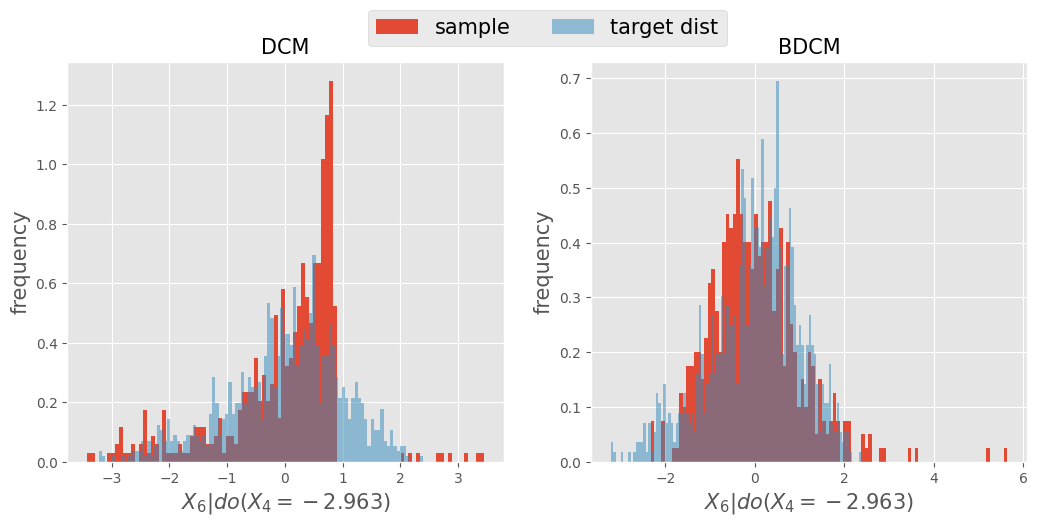

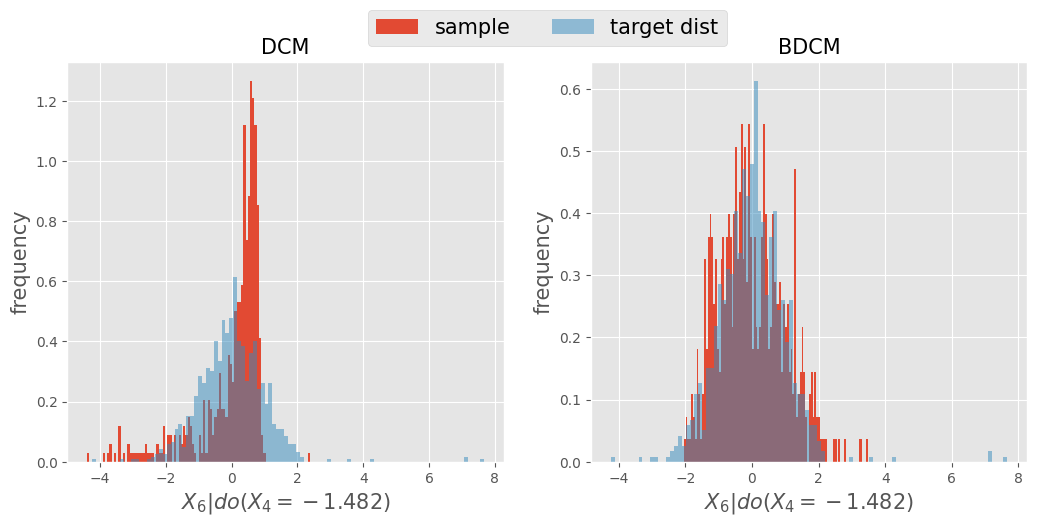

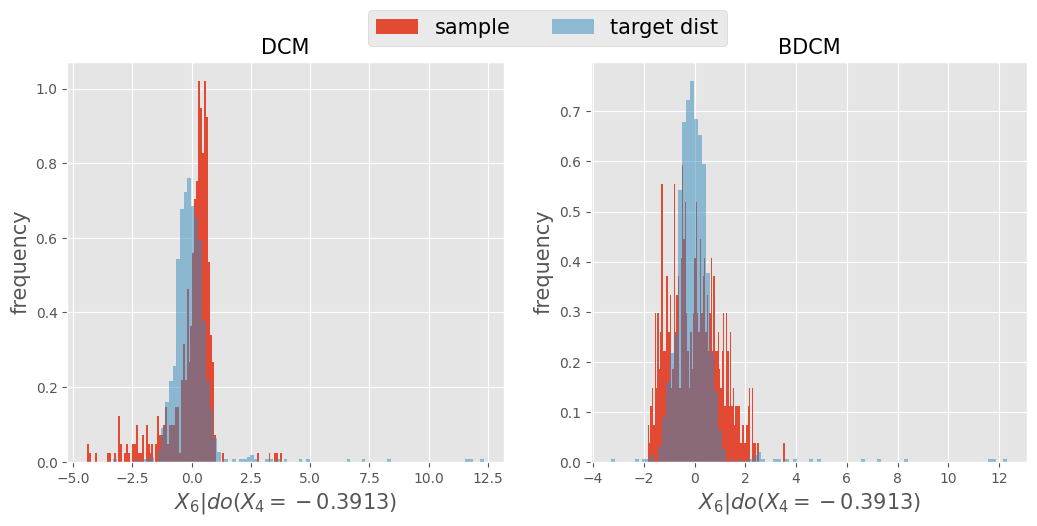

100%|██████████| 5/5 [44:51<00:00, 538.35s/it]

mean of MMD for DCM: 0.00307
standard deviation of MMD for DCM: 0.00168
mean of MMD for BDCM: 0.00234
standard deviation of MMD for BDCM: 0.00153
mean of all MMD for DCM: 0.00507
standard deviation of all MMD for DCM: 0.00217
mean of all MMD for BDCM: 0.00508
standard deviation of all MMD for BDCM: 0.00251


In [3]:
# Define the structual equation
# X_i = f_i(X_{pa_i}) + U_i

def structural_eq(u, ind, x):
  if ind == 0:
    output = u
  elif ind == 1:
    output = x[0] ** 2 + u
  elif ind == 2:
    output = x[1] + u
  elif ind == 3:
    output = x[2] ** 3 + x[2] + u
  elif ind == 4:
    output = x[2] ** 2 + 0.1 + u
  elif ind == 5:
    output = x[1] * x[3] + x[1] * x[4] + x[3] * x[4] + u
  return normalize(output)


SCM2(structural_eq=structural_eq, simple_or_complex = "simple")